<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week7/Assignment_Modul_Minggu7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lakukan analisis data time series “Value” dengan menggunakan model ARIMA dan
gunakan model tersebut untuk memprediksi persentase konsumsi untuk 12 bulan ke
depan. Tunjukkan hasil prediksi dan bandingkan dengan data aktual.

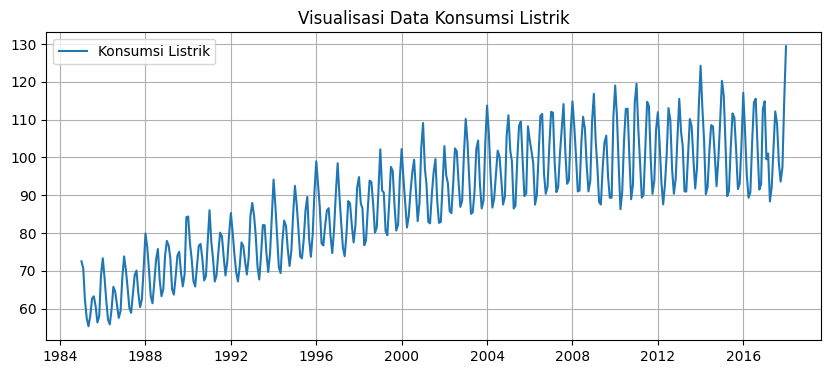

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


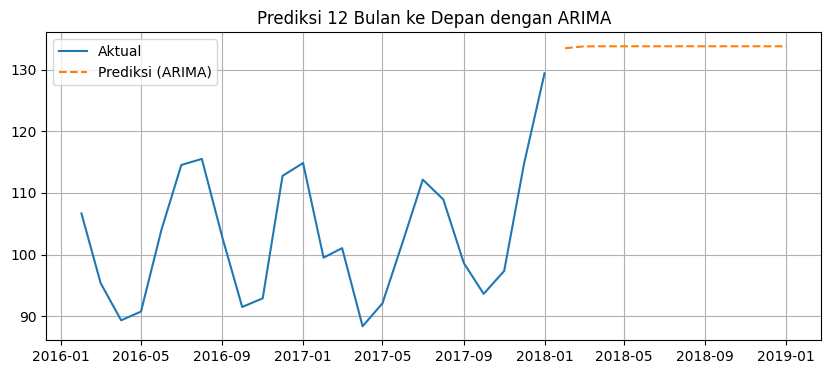

RMSE ARIMA: 32.51423216277194


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data sample
data = pd.read_csv('Electric_Production.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Plot data awal
plt.figure(figsize=(10, 4))
plt.plot(data['Value'], label='Konsumsi Listrik')
plt.title('Visualisasi Data Konsumsi Listrik')
plt.grid()
plt.legend()
plt.show()

# Model ARIMA
model_arima = ARIMA(data['Value'], order=(1,1,1))
hasil_model = model_arima.fit()

# Prediksi 12 bulan ke depan
prediksi_12bulan = hasil_model.forecast(steps=12)
prediksi_12bulan.index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 4))
plt.plot(data['Value'][-24:], label='Aktual')
plt.plot(prediksi_12bulan, label='Prediksi (ARIMA)', linestyle='--')
plt.title('Prediksi 12 Bulan ke Depan dengan ARIMA')
plt.grid()
plt.legend()
plt.show()

# Hitung RMSE
aktual_terakhir = data['Value'][-12:]
rmse_arima = np.sqrt(mean_squared_error(aktual_terakhir, prediksi_12bulan))
print("RMSE ARIMA:", rmse_arima)

Bangun model Long Short-Term Memory (LSTM) menggunakan neural network untuk
melakukan prediksi pada data “Value”. Bagi data menjadi training dan testing set, lalu
latih model LSTM dengan data training. Setelah itu lakukan prediksi untuk testing set dan
evaluasi hasilnya menggunakan RMSE (Root Mean Squared Error).

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


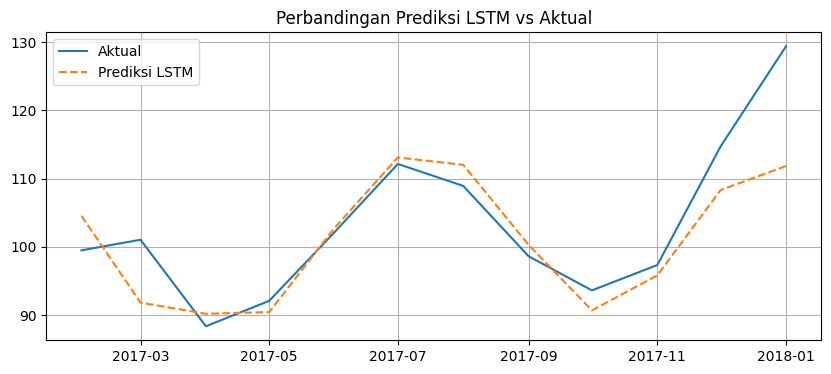

RMSE LSTM: 6.391223762053711


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Normalisasi data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Value']])

# Buat sekuens data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 12
X, y = create_sequences(data_scaled, seq_len)

# Split data train-test
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

# Bangun model LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Prediksi
prediksi_lstm = model_lstm.predict(X_test)
prediksi_lstm_inv = scaler.inverse_transform(prediksi_lstm)
y_test_inv = scaler.inverse_transform(y_test)

# Plot hasil prediksi
plt.figure(figsize=(10,4))
plt.plot(data.index[-12:], y_test_inv, label='Aktual')
plt.plot(data.index[-12:], prediksi_lstm_inv, label='Prediksi LSTM', linestyle='--')
plt.title('Perbandingan Prediksi LSTM vs Aktual')
plt.grid()
plt.legend()
plt.show()

# Evaluasi RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, prediksi_lstm_inv))
print("RMSE LSTM:", rmse_lstm)